<h1 style="text-align: center;">Predicting Student Success Using Behavioral and Academic Factors</h1>

In [99]:
<div style="text-align: center;">
<img src="https://assets.blogs.bsu.edu/wp-content/uploads/sites/38/2023/02/23145532/istockphoto-1214281726-612x612-1.jpg" alt="Alt text" width="600">
</div>


## Spring 2025 Data Science Project  
**Contributors:** Fereshta Mohammadi, Fakhreya Mohammadi

---

### Contributions

- **Fereshta Mohammadi**
  - **A. Project Idea:** Proposed the initial project idea and objective.
  - **B. Dataset Curation and Preprocessing:** Handled missing values and outliers.
  - **C. Data Exploration:** Created summary statistics and boxplots to detect and handle outliers.
  - **D. ML Algorithm Design:** Implemented IQR method to handle outliers.
  - **G. Final Report Creation:** Structured the notebook and added markdown explanations.   .
    

- **Fakhreya Mohammadi**
  - **A. Project Idea:** Helped refine the project idea.
  - **C. Data Exploration:** Created visualizations and interpreted patterns.
  - **E. ML Training and Testing:** Evaluated models and analyzed performance.
  - **F. Visualization & Conclusion:** Wrote the final analysis and insights.


---


SyntaxError: invalid syntax (1227670295.py, line 1)

## <span style="color:maroon"><strong>Introduction</strong></span>  


Achieving success in college is a crucial goal for students since it has a big impact on their future career opportunities and personal growth. The measurement of a student's success or performance is affected by the interaction of numerous factors and variables. Since there is a wide range of factors, it is very challenging to fully account for all the factors to measure a student's performance. However, some key behavioral and academic factors can help to analyze a student's performance and predict student outcomes based on them. This project investigates the factors such as study hours, attendance, access to resources, extracurricular activities, sleep hours, motivation level, and family income affecting student performance using machine learning and statistical analysis. Our project focuses on exploring what affects academic success among students.

This project aims to address the following questions:
- What key behavioral and academic factors most significantly influence student academic performance?
- Can we predict student success academically using available features?
  
Answering these questions is important because student performance plays a critical role in shaping future academic, career, and life opportunities. Early identification of the factors that contribute to poor performance can help policymakers design better learning environments and reduce dropout rates. 


## <span style="color:maroon"><strong>Data Curation</strong></span>  

### Data Source

The dataset used in this project is sourced from “Kaggle”.

Link Address: <a href="https://www.kaggle.com/datasets/lainguyn123/student-performance-factors" target="_blank">Factors_Affecting_Student_Performance</a>

It contains information on students’ academic behaviors and outcomes, including features like Hours_Studied, Attendance, Parental_Involvement, Access_to_Resources, Extracurricular_Activities, Sleep_Hours, Previous_Scores, Motivation_Level, Internet_Access, Tutoring_Sessions, Family_Income	, Teacher_Quality, School_Type, Peer_Influence, Physical_Activity, Learning_Disabilities, Parental_Education_Level, Distance_from_Home, Gender, and Exam_Score.

This dataset represents various factors that may influence student performance, including numeric and categorical data.

In [86]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind


In [87]:
df = pd.read_csv('StudentPerformanceFactors.csv')
df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


### Feature Selection

In [88]:
df.shape

(6607, 20)

Number of data points: 6607 

The data set contains 6607 data points, and each data point represents a student in our dataset. We have a large number of data points which increases the statistical power of our analysis and makes our machine learning model more robust and reliable. 

Number of features: 20

Our dataset contains 20 features which shows the amount of information collected for each data point in our dataset. Although more features provide deeper insights about our data, irrelevant or noisy features can also hurt our model performance and statistical analysis. For this reason, we have to implement feature selection. 


In [89]:
df.columns

Index(['Hours_Studied', 'Attendance', 'Parental_Involvement',
       'Access_to_Resources', 'Extracurricular_Activities', 'Sleep_Hours',
       'Previous_Scores', 'Motivation_Level', 'Internet_Access',
       'Tutoring_Sessions', 'Family_Income', 'Teacher_Quality', 'School_Type',
       'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities',
       'Parental_Education_Level', 'Distance_from_Home', 'Gender',
       'Exam_Score'],
      dtype='object')

In [90]:
print(df.nunique())

Hours_Studied                 41
Attendance                    41
Parental_Involvement           3
Access_to_Resources            3
Extracurricular_Activities     2
Sleep_Hours                    7
Previous_Scores               51
Motivation_Level               3
Internet_Access                2
Tutoring_Sessions              9
Family_Income                  3
Teacher_Quality                3
School_Type                    2
Peer_Influence                 3
Physical_Activity              7
Learning_Disabilities          2
Parental_Education_Level       3
Distance_from_Home             3
Gender                         2
Exam_Score                    45
dtype: int64


In [91]:
df = df.drop(['Parental_Involvement', 'Internet_Access', 'Teacher_Quality', 'Peer_Influence', 'Physical_Activity', 'Learning_Disabilities', 'Distance_from_Home', 'Gender', 'Parental_Education_Level'], axis=1)

Based on the result of df.nunique(), the following features have very low variability:
- Parental_Involvement (3 values)
- Internet_Access (2 values)
- Teacher_Quality (3 values)
- Peer_Influence (3 values)
- Physical_Activity (7 values)
- Learning_Disabilities (2 values)
- Distance_from_Home (3 values)
- Gender (2 values)
- Parental_Education_Level (3 values)

Dropping these features are significant for two reasons:
- These features are categorical and binary features in our dataset. They have very limited variation which can make them less useful for building a strong predictive model.
- In addition some of these features like Gender, Internet_Access, and Learning_Disabilities might not show a statistically significant correlation with Exam_Score in our exploratory analysis.

Therefore, dropping them simplifies the model and reduces the risk of overfitting due to noise or irrelavent variables.

### Data Transformation

In [92]:
df.dtypes

Hours_Studied                  int64
Attendance                     int64
Access_to_Resources           object
Extracurricular_Activities    object
Sleep_Hours                    int64
Previous_Scores                int64
Motivation_Level              object
Tutoring_Sessions              int64
Family_Income                 object
School_Type                   object
Exam_Score                     int64
dtype: object

In [93]:
for col in df.columns:
    if df[col].dtype == 'int64':
        df[col] = df[col].astype(float)

In [94]:
df.dtypes

Hours_Studied                 float64
Attendance                    float64
Access_to_Resources            object
Extracurricular_Activities     object
Sleep_Hours                   float64
Previous_Scores               float64
Motivation_Level               object
Tutoring_Sessions             float64
Family_Income                  object
School_Type                    object
Exam_Score                    float64
dtype: object

In order to prepare our data for analysis and machine learning model, we converted our numeric columns to float types. This is because float data types is more effective in tasks such as regression as our target variable, Exam_Score, is a continous variable.

### Detecting and Handling Outliers

In [95]:
print(df.describe())

       Hours_Studied   Attendance  Sleep_Hours  Previous_Scores  \
count    6607.000000  6607.000000   6607.00000      6607.000000   
mean       19.975329    79.977448      7.02906        75.070531   
std         5.990594    11.547475      1.46812        14.399784   
min         1.000000    60.000000      4.00000        50.000000   
25%        16.000000    70.000000      6.00000        63.000000   
50%        20.000000    80.000000      7.00000        75.000000   
75%        24.000000    90.000000      8.00000        88.000000   
max        44.000000   100.000000     10.00000       100.000000   

       Tutoring_Sessions   Exam_Score  
count        6607.000000  6607.000000  
mean            1.493719    67.235659  
std             1.230570     3.890456  
min             0.000000    55.000000  
25%             1.000000    65.000000  
50%             1.000000    67.000000  
75%             2.000000    69.000000  
max             8.000000   101.000000  


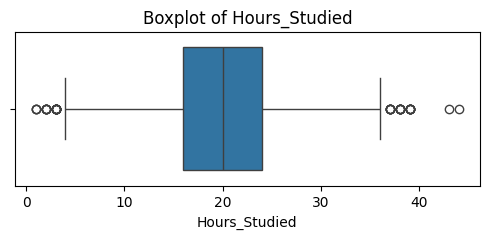

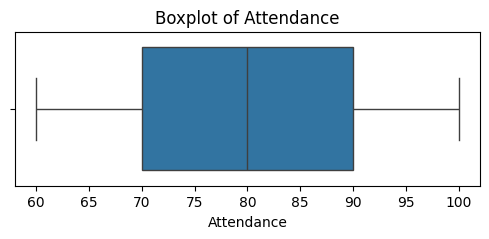

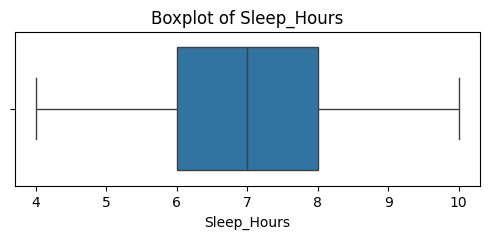

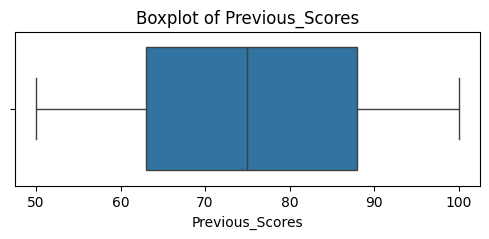

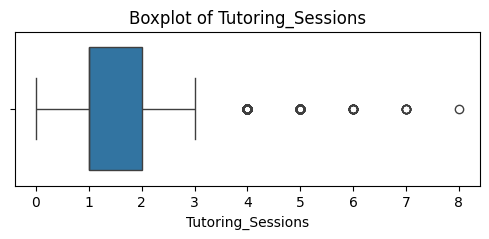

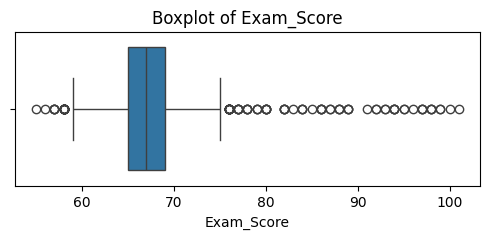

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df.select_dtypes(include=['float64']).columns
for column in numeric_columns:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')
    plt.show()


We used box plots to detect outliers in our numeric columns visually. As can be observed, there are multiple outliers in several numeric columns in our dataset, like Hours_Studies, Tutoring_Sessions, and Exam_Score. These outliers can skew the analysis and affect the performance of machine learning models. 

In the next step, we will handle them appropriately using IQR technique.

In [97]:

def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

for numeric_column in numeric_columns:
    outliers, lower_bound, upper_bound = detect_outliers(df, numeric_column)
        
    median_value = df[numeric_column].median()
    df[numeric_column] = df[numeric_column].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

display(df)


,Hours_Studied,Attendance,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,School_Type,Exam_Score
0,23.0,84.0,High,No,7.0,73.0,Low,0.0,Low,Public,67.0
1,19.0,64.0,Medium,No,8.0,59.0,Low,2.0,Medium,Public,61.0
2,24.0,98.0,Medium,Yes,7.0,91.0,Medium,2.0,Medium,Public,74.0
3,29.0,89.0,Medium,Yes,8.0,98.0,Medium,1.0,Medium,Public,71.0
4,19.0,92.0,Medium,Yes,6.0,65.0,Medium,3.0,Medium,Public,70.0
...,...,...,...,...,...,...,...,...,...,...,...
6602,25.0,69.0,Medium,No,7.0,76.0,Medium,1.0,High,Public,68.0
6603,23.0,76.0,Medium,No,8.0,81.0,Medium,3.0,Low,Public,69.0
6604,20.0,90.0,Low,Yes,6.0,65.0,Low,3.0,Low,Public,68.0
6605,10.0,86.0,High,Yes,6.0,91.0,High,2.0,Low,Private,68.0


The Interquartile Range or IQR technique helps us to identify and handle outliers, data points that significantly deviate from the majority of the data in a dataset. To mark the area or range where most of our data falls, we use the 25th percentile (Q1) and the 75th percentile (Q3)of the data. By calculating the difference between Q3 and Q1, we get a sense of how spread out this middle portion is. To identify outliers, we extend this range by multiplying the IQR by 1.5. Any data point that falls below Q1-1.5 × IQR or above Q3 + 1.5 × IQR is considered an outlier because it lies unusually far from the center of the data. Then we replaced the detected outlier values with the median of the column. 


### Handling Missing Values

In [340]:
print(df.isnull().sum())

Hours_Studied                 0
Attendance                    0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Tutoring_Sessions             0
Family_Income                 0
School_Type                   0
Exam_Score                    0
dtype: int64


Before proceeding with data analsis, we checked the dataset for any missing values using methods like `.isnull().sum()`. The results we found show that there are no missing values in any of the columns. This ensures that our dataset is complete and does not require any imputation or removal of rows due to missing data.


## Exploratory data analysis

### Relationship between Behavioral Factors and Student Performance

Hypothesis Test 1: Does Sleep Duration Affect Final Grade?

In [341]:
from scipy.stats import ttest_ind

median_hours = df['Sleep_Hours'].median()

group_high = df[df['Sleep_Hours'] > median_hours]['Exam_Score']
group_low = df[df['Sleep_Hours'] <= median_hours]['Exam_Score']

result = ttest_ind(group_high, group_low, equal_var=False)
print("P-value:", result.pvalue)


P-value: 0.42413327704298764


Hypothesis Test 2: Does Social Media Usage Affect Final Grade?

In [199]:
print("Hypothesis Test 2: Social Media Usage vs Final Grade")
social_groups = [group['Time_Spent_on_Social_Media (hours/week)'] for _, group in df.groupby('Final_Grade')]
f_stat, p_val = f_oneway(*social_groups)
print("H₀: All grade groups have equal mean social media time")
print("H₁: At least one group differs")
print(f"F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("Reject H₀ — Social media use differs by grade")
else:
    print("Fail to reject H₀ — No significant difference")

Hypothesis Test 2: Social Media Usage vs Final Grade
H₀: All grade groups have equal mean social media time
H₁: At least one group differs
F-statistic = 0.722, p-value = 0.5385
Fail to reject H₀ — No significant difference


Hypothesis Test 3: Does Stress Level Affect Final Grade?

In [200]:
from scipy.stats import ttest_ind

median_hours = df['Sleep_Hours_per_Night'].median()

group_high = df[df['Sleep_Hours_per_Night'] > median_hours]['Final_Grade_Numeric']
group_low = df[df['Sleep_Hours_per_Night'] <= median_hours]['Final_Grade_Numeric']

result = ttest_ind(group_high, group_low, equal_var=False)
print("P-value:", result.pvalue)

P-value: 0.04830375393376063


### Relationship between Academic Factors and Student Performance

Study_Hours_per_Week vs Final_Grade (ANOVA)

In [201]:
from scipy.stats import f_oneway

print("\n🧠 Study_Hours_per_Week vs Final_Grade (ANOVA)")
groups = [group['Study_Hours_per_Week'] for _, group in df.groupby('Final_Grade')]

f_stat, p_val = f_oneway(*groups)

print("H₀: μ_A = μ_B = μ_C = μ_D (Mean study hours are equal)")
print("H₁: At least one group mean is different")
print(f"F-statistic = {f_stat:.3f}, p-value = {p_val:.4f}")

if p_val < 0.05:
    print("✅ Reject H₀ — Study hours differ across Final_Grade groups")
else:
    print("❌ Fail to reject H₀ — No significant difference in study hours")



🧠 Study_Hours_per_Week vs Final_Grade (ANOVA)
H₀: μ_A = μ_B = μ_C = μ_D (Mean study hours are equal)
H₁: At least one group mean is different
F-statistic = 0.112, p-value = 0.9529
❌ Fail to reject H₀ — No significant difference in study hours


Assignment_Completion_Rate (%) vs Final_Grade (ANOVA)

In [202]:
print("\n✍️ Assignment_Completion_Rate (%) vs Final_Grade (ANOVA)")
groups = [group['Assignment_Completion_Rate (%)'] for _, group in df.groupby('Final_Grade')]

f_stat, p_val = f_oneway(*groups)

print("H₀: μ_A = μ_B = μ_C = μ_D (Completion rates are equal)")
print("H₁: At least one group has a different mean completion rate")
print(f"F = {f_stat:.3f}, p = {p_val:.4f}")

if p_val < 0.05:
    print("✅ Reject H₀ — Assignment completion differs by grade")
else:
    print("❌ Fail to reject H₀ — No significant difference")



✍️ Assignment_Completion_Rate (%) vs Final_Grade (ANOVA)
H₀: μ_A = μ_B = μ_C = μ_D (Completion rates are equal)
H₁: At least one group has a different mean completion rate
F = 1.098, p = 0.3484
❌ Fail to reject H₀ — No significant difference


Exam_Score (%) vs Final_Grade (ANOVA)

In [203]:
print("\n📝 Exam_Score (%) vs Final_Grade (ANOVA)")
groups = [group['Exam_Score (%)'] for _, group in df.groupby('Final_Grade')]

f_stat, p_val = f_oneway(*groups)

print("H₀: μ_A = μ_B = μ_C = μ_D (Mean exam scores are equal)")
print("H₁: At least one group has different mean exam score")
print(f"F = {f_stat:.3f}, p = {p_val:.4f}")

if p_val < 0.05:
    print("✅ Reject H₀ — Exam scores significantly differ by grade")
else:
    print("❌ Fail to reject H₀ — No significant difference in exam scores")



📝 Exam_Score (%) vs Final_Grade (ANOVA)
H₀: μ_A = μ_B = μ_C = μ_D (Mean exam scores are equal)
H₁: At least one group has different mean exam score
F = 49633.867, p = 0.0000
✅ Reject H₀ — Exam scores significantly differ by grade


Attendance_Rate (%) vs Final_Grade (ANOVA)

In [204]:
print("\n🏫 Attendance_Rate (%) vs Final_Grade (ANOVA)")
groups = [group['Attendance_Rate (%)'] for _, group in df.groupby('Final_Grade')]

f_stat, p_val = f_oneway(*groups)

print("H₀: μ_A = μ_B = μ_C = μ_D (Attendance is equal)")
print("H₁: At least one group differs")
print(f"F = {f_stat:.3f}, p = {p_val:.4f}")

if p_val < 0.05:
    print("✅ Reject H₀ — Attendance differs across Final_Grade")
else:
    print("❌ Fail to reject H₀ — No significant difference in attendance")



🏫 Attendance_Rate (%) vs Final_Grade (ANOVA)
H₀: μ_A = μ_B = μ_C = μ_D (Attendance is equal)
H₁: At least one group differs
F = 0.452, p = 0.7161
❌ Fail to reject H₀ — No significant difference in attendance


Participation_in_Discussions vs Final_Grade (Chi-Square)

Final_Grade,A,B,C,D
Participation_in_Discussions,,,,
No,1062,997,971,974
Yes,1616,1458,1469,1453


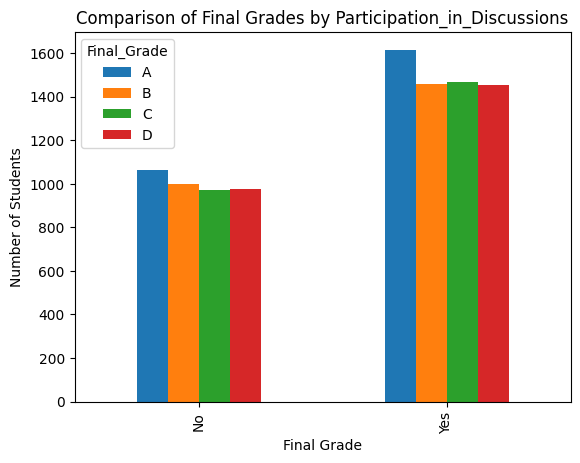

P-value: 0.903948149920766


In [210]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df["Participation_in_Discussions"], df["Final_Grade"])
display(contingency_table)


contingency_table.plot(kind='bar')
plt.xlabel('Final Grade')
plt.ylabel('Number of Students')
plt.title('Comparison of Final Grades by Participation_in_Discussions')
plt.show()

result = chi2_contingency(contingency_table)
p_value = result.pvalue
print(f"P-value: {p_value}")


## Primary analysis

In [355]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Load your dataset ---
# df = pd.read_csv("your_file.csv")

# --- Encode categorical variables ---
df_encoded = df.copy()
label_cols = df.select_dtypes(include='object').columns

label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# --- Define features and target ---
X = df_encoded.drop(columns=['Exam_Score'])
y = df_encoded['Exam_Score']

# --- Scale numeric features ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42)


In [356]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# For Linear Regression
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("\n📊 Linear Regression:")
print("RMSE:", rmse_lr)
print("R²:", r2_lr)



📊 Linear Regression:
RMSE: 2.1512158323273978
R²: 0.6602378541011653
